In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#uploading data files
from google.colab import files
upload = files.upload()

Saving 2012 Stack Overflow Survey Results.csv to 2012 Stack Overflow Survey Results.csv
Saving LinkedInTopSkillscsv.csv to LinkedInTopSkillscsv.csv
Saving udemy_courses.csv to udemy_courses.csv


In [20]:
#reading data file using padas
df = pd.read_csv("udemy_courses.csv")
df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [21]:
print(df.columns)
print(df.shape)

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')
(3678, 12)


In [22]:
print(f"Dataframe shape : {df.shape}")
for column in df.columns:
    print(f"{column} : {len(df[column].value_counts())}")
#number of unique values in each column

Dataframe shape : (3678, 12)
course_id : 3672
course_title : 3663
url : 3672
is_paid : 2
price : 38
num_subscribers : 2197
num_reviews : 511
num_lectures : 229
level : 4
content_duration : 105
published_timestamp : 3672
subject : 4


The shape of Dataframe is (3678,10) but the number of course id's are 3672 so there must be some duplicate rows in the dataframe

In [23]:
df = df.drop_duplicates() #removing duplicates
print(df.shape) 

(3672, 12)


duplicate rows are removed

In [24]:
df.isnull().sum() #check if there are any null values

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

There are no null values in the dataframe

In [25]:
#analyse all numeric columns using describe()
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.758977e+05,66.102941,3190.586874,156.371460,40.140251,4.097603
std,3.430720e+05,61.035920,9488.105448,936.178649,50.417102,6.057830
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077615e+05,20.000000,111.750000,4.000000,15.000000,1.000000
50%,6.876920e+05,45.000000,912.000000,18.000000,25.000000,2.000000
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


# Major conclusions from the above table are as follows:

1.  There are courses containing no lectures as well as no content duration
2.  content duration and number of lectures at 75th percentile are only 4.5 hrs and 26 while their maximum is 78.5 and 779
3.  number of subscribers at 75th percentile is 2548.75 while its maximum is 268923.0
4.  number of reviews at 75th percentile are 67 while its maximum is 27445
5.  maximum price of any course is 200
6.  There are courses with 0 subscribers
7.  maximum content duration is 78.5 hrs

In [26]:
print(df["level"].unique())
print(df["subject"].unique())
print(df["is_paid"].unique())

['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level']
['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']
[ True False]


In [27]:
df.loc[:,"levels"] = -1
df.loc[df["level"]=="All Levels","levels"]=0
df.loc[df["level"]=="Intermediate Level","levels"]=2
df.loc[df["level"]=="Beginner Level","levels"]=1
df.loc[df["level"]=="Expert Level","levels"]=3

df.loc[:,"subjects"] = -1
df.loc[df["subject"]=="Business Finance","subjects"]=0
df.loc[df["subject"]=="Graphic Design","subjects"]=2
df.loc[df["subject"]=="Musical Instruments","subjects"]=1
df.loc[df["subject"]=="Web Development","subjects"]=3

df.loc[:,"paid_or_not"] = -1
df.loc[df["is_paid"]== False,"paid_or_not"] = 0
df.loc[df["is_paid"]== True,"paid_or_not"] = 1

df.loc[:,"publish_timestamp"] = pd.to_datetime(df["published_timestamp"]).dt.year

In [28]:
df = df.drop(columns = ["level","subject","is_paid","published_timestamp"] )

In [29]:
df.head(5)

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,content_duration,levels,subjects,paid_or_not,publish_timestamp
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,200,2147,23,51,1.5,0,0,1,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,75,2792,923,274,39.0,0,0,1,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,45,2174,74,51,2.5,2,0,1,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,95,2451,11,36,3.0,0,0,1,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,200,1276,45,26,2.0,2,0,1,2016


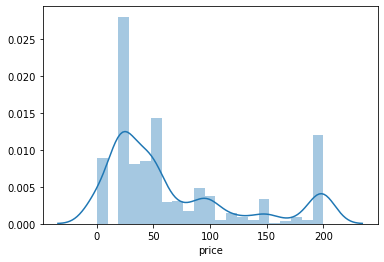

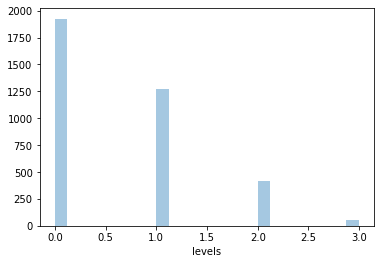

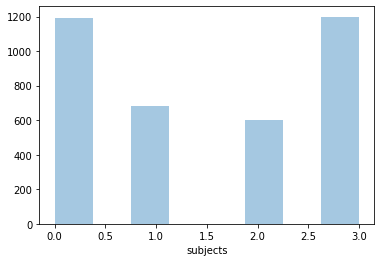

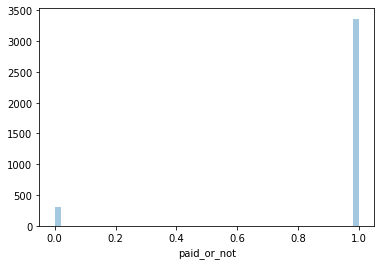

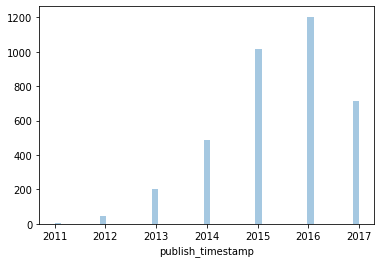

In [30]:
#plotting barplots for categorical data
p1 = sns.distplot(df["price"],kde = True)
plt.show()
p2 = sns.distplot(df["levels"],kde = False)
plt.show()
p3 = sns.distplot(df["subjects"],kde = False)
plt.show()
p4 = sns.distplot(df["paid_or_not"],kde = False)
plt.show()
p4 = sns.distplot(df["publish_timestamp"],kde = False)
plt.show()

In [31]:
print(df["paid_or_not"].value_counts())
print("-"*20)
print(df["levels"].value_counts())
print("-"*20)
print(df["subjects"].value_counts())
print("-"*20)
print(df["publish_timestamp"].value_counts())
print("-"*20)

1    3362
0     310
Name: paid_or_not, dtype: int64
--------------------
0    1925
1    1268
2     421
3      58
Name: levels, dtype: int64
--------------------
3    1199
0    1191
1     680
2     602
Name: subjects, dtype: int64
--------------------
2016    1204
2015    1014
2017     713
2014     490
2013     201
2012      45
2011       5
Name: publish_timestamp, dtype: int64
--------------------


# Conclusions from above:

*   The number of paid courses are much higher than non_paid
*   number of "All levels" courses courses are most,much higher than "Expert Level" courses followed by "Intermediate level" courses
*   number of "web development" and "Business Finance" courses are comparable and higher than the other two
*   most of the courses have price range between 0-50


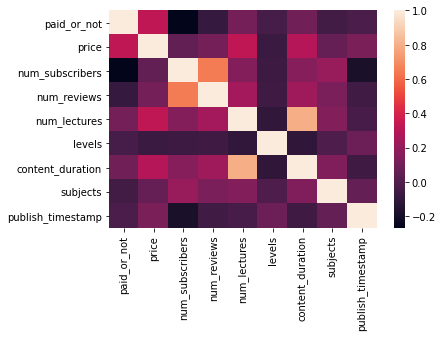

In [32]:
sns.heatmap(df[['paid_or_not', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'levels',
       'content_duration', 'subjects',"publish_timestamp"]].corr())

In [33]:
df[['paid_or_not', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'levels',
       'content_duration', 'subjects',"publish_timestamp"]].corr()

,paid_or_not,price,num_subscribers,num_reviews,num_lectures,levels,content_duration,subjects,publish_timestamp
paid_or_not,1.000000,0.328910,-0.267056,-0.087445,0.112788,-0.032982,0.094594,-0.041110,-0.017662
price,0.328910,1.000000,0.050436,0.113568,0.329944,-0.073455,0.293200,0.065144,0.133654
num_subscribers,-0.267056,0.050436,1.000000,0.651070,0.158351,-0.061454,0.162118,0.214254,-0.182697
num_reviews,-0.087445,0.113568,0.651070,1.000000,0.243019,-0.055654,0.228852,0.125489,-0.053061
num_lectures,0.112788,0.329944,0.158351,0.243019,1.000000,-0.102552,0.801624,0.150738,-0.025243
levels,-0.032982,-0.073455,-0.061454,-0.055654,-0.102552,1.000000,-0.107397,-0.008831,0.082506
content_duration,0.094594,0.293200,0.162118,0.228852,0.801624,-0.107397,1.000000,0.141784,-0.058824
subjects,-0.041110,0.065144,0.214254,0.125489,0.150738,-0.008831,0.141784,1.000000,0.063329
publish_timestamp,-0.017662,0.133654,-0.182697,-0.053061,-0.025243,0.082506,-0.058824,0.063329,1.000000


#  Analysing the data distribution by paid and non paid courses:

Total paid courses:3362, Total unpaid courses:310
levels          0     1    2   3
paid_or_not                     
0             122   158   30   0
1            1803  1110  391  58


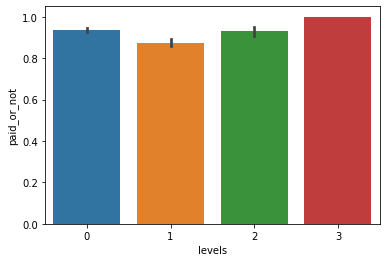

In [34]:
sns.barplot(x = "levels",y = "paid_or_not",data = df)
print("Total paid courses:{}, Total unpaid courses:{}".format(df["paid_or_not"].value_counts().values[0],df["paid_or_not"].value_counts().values[1]))
print(pd.crosstab(df["paid_or_not"], df["levels"]))
#levels and the if paid or not
#shows that 1.Expert level is not included in unpaid courses
#2.

In [35]:
print(df.loc[df["paid_or_not"]==0,"num_subscribers"].to_frame().describe())
print("-"*30)
print(df.loc[df["paid_or_not"]==1,"num_subscribers"].to_frame().describe())

       num_subscribers
count       310.000000
mean      11533.951613
std       23620.569473
min           1.000000
25%        2222.250000
50%        4869.500000
75%       10637.500000
max      268923.000000
------------------------------
       num_subscribers
count      3362.000000
mean       2421.270077
std        6326.164761
min           0.000000
25%          90.250000
50%         736.000000
75%        2058.250000
max      121584.000000


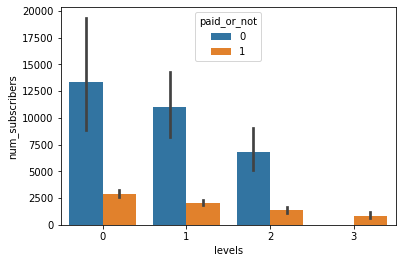

In [36]:
sns.barplot(x = df["levels"],y=df["num_subscribers"],hue = df["paid_or_not"])

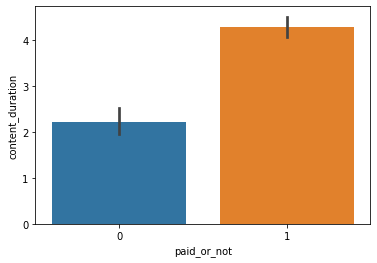

In [37]:
sns.barplot(x = df["paid_or_not"],y = df["content_duration"])

In [38]:
sns.barplot(x=df["is_paid"], y=df["num_lectures"])

KeyError: ignored


*   There are no non paid courses for "expert level" courses
*   Most of the non paid courses are of "Intermediate level"
*  While paid courses are much more than non paid courses (almost 10 times in number), the average number of subscribers in non paid courses are more(11533 vs 2421)
*  maxixmum number of subscribers in non paid courses are  268923 more than double of number of paid courses 121584
*  Number of subscribers in the non paid courses with "All level" courses are most
*  Average content duration of paid courses is more than unpaid



# Analysis on the basis of content duration and number of lectures

In [ ]:
sns.barplot(x=df["num_lectures"], y=df["content_duration"], hue=df["paid_or_not"])

In [ ]:
sns.relplot(x="content_duration", y="num_reviews", hue="num_lectures", data=df)
plt.show()

In [ ]:
sns.relplot(x="content_duration", y="num_subscribers", hue="num_lectures", data=df)
plt.show()

*   In general content duration increases as number of lectures increases
*   distribution of number of reviews and subscribers are more towards less content duration

#  Effect of number of views on the number of subscribers:

In [ ]:
sns.relplot(x = "num_reviews",y = "num_subscribers",hue = "subjects",data = df)
plt.show()
sns.relplot(x = "num_reviews",y = "num_subscribers",kind = "line",data = df)
plt.show()


*   according to heatmap number of reviews has the most effects on subscribers
*   we can see that generally as the  number of reviews increase the number of subscribers also increase
*   Most courses with large number of subscribers are web development courses

#  Analyzing data on the basis of subject:

In [ ]:
sns.barplot(x = df["subjects"],y = df["num_subscribers"])
plt.plot()

In [ ]:
sns.barplot(x = df["subjects"],y = df["num_reviews"])
plt.plot()

In [ ]:
sns.barplot(x = df["subjects"],y = df["num_lectures"])
plt.plot()

In [ ]:
sns.barplot(x = df["subjects"],y = df["content_duration"])
plt.plot()


*   web development courses have the most number of subscribers
*   web development courses have the most number of reviews
*   web development courses have the most number of lectures
*   web development courses have the largest content duration




# Analyzing top 25 courses with most number of subscribers:

In [ ]:
df_sorted_sub = df.sort_values(['num_subscribers'],ascending=[False])[0:25]
fig = sns.barplot(x = df_sorted_sub["course_title"],y = df_sorted_sub["num_subscribers"])
fig.plot()
df_sorted_sub

In [39]:
print((df_sorted_sub["subjects"].value_counts()/25.0)*100)
fig = sns.distplot(df_sorted_sub["subjects"],kde = False)
fig.plot()


NameError: ignored

In [ ]:
print((df_sorted_sub["paid_or_not"].value_counts()/25.0)*100)
fig = sns.distplot(df_sorted_sub["paid_or_not"],kde = False)
fig.plot()


In [ ]:
print((df_sorted_sub["levels"].value_counts()/25.0)*100)
fig = sns.distplot(df_sorted_sub["levels"],kde = False)
fig.plot()

*   Intrestingly 80% of the top 25 courses are web development courses while musical instrument courses and business courses are 8% and rest graphic designing ccourses
*   Out of them 44% are paid and 56% are unpaid
*   76% of the courses are of "All level" courses while
rest are "Intermediate level" courses. No other levels are available

# Analyzing top 25 courses with most number of reviews:

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,content_duration,levels,subjects,paid_or_not,publish_timestamp
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200,121584,27445,342,43.0,0,3,1,2015
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,114512,22412,304,30.5,0,3,1,2016
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,190,73783,19649,329,22.0,0,3,1,2016
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,175,79612,16976,85,11.5,0,3,1,2015
3254,705264,Modern React with Redux,https://www.udemy.com/react-redux/,180,50815,15117,150,26.5,0,3,1,2015
3246,289230,Learn and Understand AngularJS,https://www.udemy.com/learn-angularjs/,175,59361,11580,55,7.0,0,3,1,2014
3251,461160,Learn and Understand NodeJS,https://www.udemy.com/understand-nodejs/,195,58208,11123,98,13.0,0,3,1,2015
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0,268923,8629,45,10.5,0,3,0,2013
3228,719002,Angular 2 with TypeScript for Beginners: The P...,https://www.udemy.com/angular-2-tutorial-for-b...,150,40070,8341,194,9.5,0,3,1,2016
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,200,75499,7676,362,30.0,0,1,1,2014


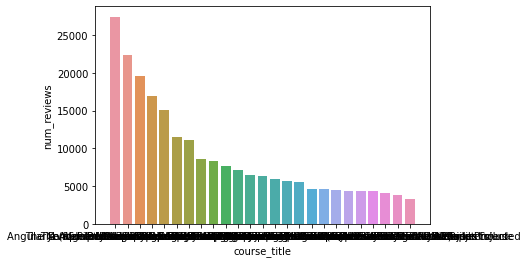

In [40]:
df_sorted_rev = df.sort_values(['num_reviews'],ascending=[False])[0:25]
fig = sns.barplot(x = df_sorted_rev["course_title"],y = df_sorted_rev["num_reviews"])
fig.plot()
df_sorted_rev

3    92.0
1     4.0
0     4.0
Name: subjects, dtype: float64


[]

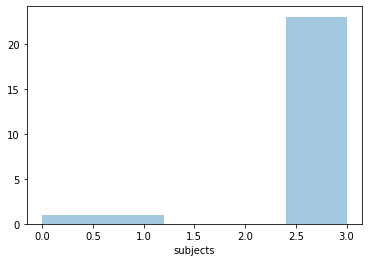

In [41]:
print((df_sorted_rev["subjects"].value_counts()/25.0)*100)
fig = sns.distplot(df_sorted_rev["subjects"],kde = False)
fig.plot()

1    68.0
0    32.0
Name: paid_or_not, dtype: float64


[]

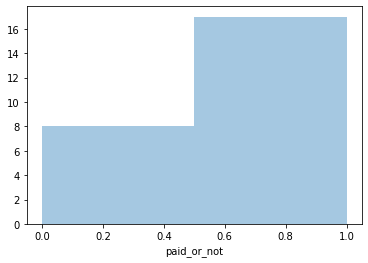

In [42]:
print((df_sorted_rev["paid_or_not"].value_counts()/25.0)*100)
fig = sns.distplot(df_sorted_rev["paid_or_not"],kde = False)
fig.plot()

0    80.0
1    16.0
2     4.0
Name: levels, dtype: float64


[]

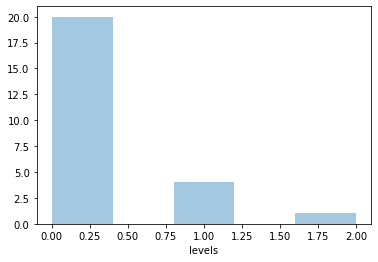

In [43]:
print((df_sorted_rev["levels"].value_counts()/25.0)*100)
fig = sns.distplot(df_sorted_rev["levels"],kde = False)
fig.plot()

*   Intrestingly 92% of the top 25 courses with most reviews are web development courses while musical instrument courses and business courses are 4% each, no musical instrument course is in the list
*   Out of them 68% are paid and 32% are unpaid
*   80% of the courses are of "All level" courses while
16% "Intermediate level" courses and rest 4% are "Begineer level"

# Analysis of courses over years:

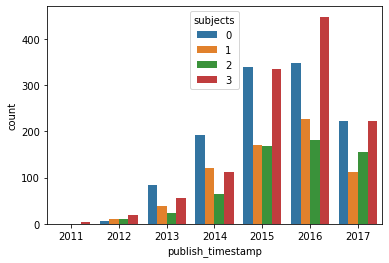

In [44]:
sns.countplot(x = "publish_timestamp",hue = "subjects",data = df)

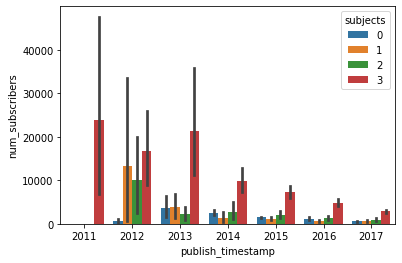

In [45]:
sns.barplot(x = df["publish_timestamp"],y = df["num_subscribers"],hue = df["subjects"])

*  Number of courses have increased quite heavily from 2011 to 2016, while we saw decrement in the number of courses in 2017

*  Number of subscribers of business courses have increased from 2012 to 2013 and decreasing since.
*  Web development subscribers trends in decreasing over the years since 2011. 
*   Music instrument courses were maximum in 2012 and decreasing since then
*   desigining courses also saw a decreasing trends in subscribers since 2012



#  Correlating data with external sources

In [46]:
df_corr = pd.read_csv("/content/LinkedInTopSkillscsv.csv")
df_corr

,Year Published,Top Skills Year,Rank,Skill,Region,Comparable to previous year?,URL
0,2018.0,2017,1.0,Cloud and Distributed Computing,US,Yes,https://blog.linkedin.com/2018/january/11/link...
1,2018.0,2017,2.0,Statistical Analysis and Data Mining,US,Yes,https://blog.linkedin.com/2018/january/11/link...
2,2018.0,2017,3.0,Middleware and Integration Software,US,Yes,https://blog.linkedin.com/2018/january/11/link...
3,2018.0,2017,4.0,Web Architecture and Development Framework,US,Yes,https://blog.linkedin.com/2018/january/11/link...
4,2018.0,2017,5.0,User Interface Design,US,Yes,https://blog.linkedin.com/2018/january/11/link...
5,2018.0,2017,6.0,Software Revision Control Systems,US,Yes,https://blog.linkedin.com/2018/january/11/link...
6,2018.0,2017,7.0,Data Presentation,US,Yes,https://blog.linkedin.com/2018/january/11/link...
7,2018.0,2017,8.0,SEO/SEM Marketing,US,Yes,https://blog.linkedin.com/2018/january/11/link...
8,2018.0,2017,9.0,Mobile Development,US,Yes,https://blog.linkedin.com/2018/january/11/link...
9,2018.0,2017,10.0,Network and Information Security,US,Yes,https://blog.linkedin.com/2018/january/11/link...


*   It is evident from the data that Web Architecture and Development Framework	is becoming more and more popular in the recent years according to the top skills dataset by LinkedIn. While it overpasses Business Intelligence and SEO/SEM Marketing after 2015,
User Interface Design	is gaining more and more popularity. Web Architecture and Development Framework was listed at fourth in the top skills of 2018.
This is similar to the data we have seen from udemy which infers that web development courses are more popular than any other courses evidenced from their high frequency, more subscribers, and more reviews.




In [47]:
df = pd.read_csv("2012 Stack Overflow Survey Results.csv",encoding = "iso-8859-1")
df.head()

,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you currently work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,What is your involvement in purchasing products or services for the company you work for? (You can choose more than one),Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,What types of purchases are you involved in?,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,"What is your budget for outside expenditures (hardware, software, consulting, etc) for 2011?",What type of project are you developing?,Which languages are you proficient in?,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Which desktop operating system do you use the most?,What best describes your career / job satisfaction?,"Including bonus, what is your annual compensation in USD?",Have you visited / Are you aware of Stack Overflow Careers?,Do you have a Stack Overflow Careers Profile?,"You answered you don't have a Careers profile, can you elaborate why?",Unnamed: 43,Which technology products do you own? (You can choose more than one),Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Please rate the advertising you've seen on Stack Overflow,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,Which of our sites do you frequent most?,Unnamed: 74
0,Response,Response,Response,Response,Response,Response,Response,Influencer,Recommender,Approver,Purchaser,Check Writer,No Involvement,I'm a Seller,Hardware,Servers,Software,"User Equipment: Monitors, PCs, Laptops",Consultants,Other,Response,Response,Java,JavaScript,CSS,PHP,Python,Objective-C,Ruby,SQL,C#,C++,C,Perl,HTML5,None,Other (please specify),Response,Response,Response,Response,Response,Response,Other (please specify),iPhone,Android,Blackberry,Windows Phone,Other Smart Phone,Regular Mobile Phone,Kindle,Nook,AppleTV,Boxee,Other media streaming device,Netbook,PS3,Xbox,Wii,Other gaming system,Kindle Fire,iPad,Other tablet,Other (please specify),Response,The ads are relevant,The ads are entertaining,The ads are Informative,I click on ads that interest me,I've taken a trial/purchased a product from ads,What ads? I use an ad blocker,Open-Ended Response,Response,Response,Other Stack Exchange (please specify)
1,India,NaN,20-24,<2,Consulting,"Fortune 1000 (1,000+)",Server Programmer,Influencer,Recommender,NaN,NaN,NaN,NaN,NaN,Hardware,Servers,Software,"User Equipment: Monitors, PCs, Laptops",Consultants,NaN,"<$10,000",SaaS,Java,JavaScript,NaN,NaN,NaN,NaN,NaN,SQL,NaN,C++,C,NaN,NaN,NaN,NaN,Linux,Love my job,"<$20,000",Yes,"No, but I want one! (Please provide email and ...",NaN,NaN,iPhone,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netbook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$501-$1,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Germany,NaN,25-29,<2,Other,Mature Small Business (25-100),Embedded Application Developer,NaN,Recommender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Software,NaN,Consultants,NaN,Don't know,Mobile,NaN,JavaScript,CSS,PHP,NaN,Objective-C,NaN,NaN,NaN,C++,NaN,NaN,HTML5,NaN,NaN,Windows 7,I enjoy going to work,"$20,000 - $40,000",No,No thank you,Thought Careers site was just about finding a ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$100-$250,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Disagree,NaN,Don't have an account,Stack Ov

In [48]:
list(df.columns.values)


['What Country or Region do you live in?',
 'Which US State or Territory do you live in?',
 'How old are you?',
 'How many years of IT/Programming experience do you have?',
 'How would you best describe the industry you currently work in?',
 'Which best describes the size of your company?',
 'Which of the following best describes your occupation?',
 'What is your involvement in purchasing products or services for the company you work for? (You can choose more than one)',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'What types of purchases are you involved in?',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'What is your budget for outside expenditures (hardware, software, consulting, etc) for 2011?',
 'What type of project are you developing?',
 'Which languages are you proficient in?',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Un

In [49]:
df_lang = df[list(df.columns.values)[22:36]]
df_lang

,Which languages are you proficient in?,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,Java,JavaScript,CSS,PHP,Python,Objective-C,Ruby,SQL,C#,C++,C,Perl,HTML5,None
1,Java,JavaScript,NaN,NaN,NaN,NaN,NaN,SQL,NaN,C++,C,NaN,NaN,NaN
2,NaN,JavaScript,CSS,PHP,NaN,Objective-C,NaN,NaN,NaN,C++,NaN,NaN,HTML5,NaN
3,NaN,NaN,CSS,PHP,NaN,Objective-C,NaN,SQL,NaN,NaN,NaN,NaN,HTML5,NaN
4,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6240,NaN,NaN,CSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6241,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
columns = list(df.columns.values)[22:36]
for column in columns:
    print(df_lang[column].value_counts())
    print("-"*40)

Java    2349
Name: Which languages are you proficient in?, dtype: int64
----------------------------------------
JavaScript    3128
Name: Unnamed: 23, dtype: int64
----------------------------------------
CSS    2825
Name: Unnamed: 24, dtype: int64
----------------------------------------
PHP    1926
Name: Unnamed: 25, dtype: int64
----------------------------------------
Python    1211
Name: Unnamed: 26, dtype: int64
----------------------------------------
Objective-C    606
Name: Unnamed: 27, dtype: int64
----------------------------------------
Ruby    578
Name: Unnamed: 28, dtype: int64
----------------------------------------
SQL    3295
Name: Unnamed: 29, dtype: int64
----------------------------------------
C#    2469
Name: Unnamed: 30, dtype: int64
----------------------------------------
C++    1527
Name: Unnamed: 31, dtype: int64
----------------------------------------
C    1485
Name: Unnamed: 32, dtype: int64
----------------------------------------
Perl    462
Name: Unnam

In [51]:
df['What type of project are you developing?'].value_counts()

Web Platform         2060
Enterprise           1359
Other                 878
Mobile                674
SaaS                  413
None / Unemployed     175
Response                1
Name: What type of project are you developing?, dtype: int64

*  According to developers survey 2012 by stackoverflow, javascript was second most skilled language in terms of developer proficiency. over 3128 people had proficiency in javascript. over 2060 developers were working on a project related to web platform which topped the list among other projects.
*  According to developers survey 2019 javascript was 11th most loved language
*  Indeed the popularity of javascript has decreased over years which is taken over by data analytics in the recent years
*  The ablove conclusion is similar to what we inffered earlier about the decrement in subscribers over years.

links to dataset and surveys:
*   https://insights.stackoverflow.com/survey/2019
*   https://stackoverflow.blog/2012/02/10/survey-results/